Yeray Hernández Bethencourt

# Exploring df

| Field                       | Description                                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| Person ID                   | An identifier for each individual in the dfset.                                                |
| Gender                      | The gender of the person (Male/Female).                                                          |
| Age                         | The age of the person in years.                                                                  |
| Occupation                  | The occupation or profession of the person.                                                      |
| Sleep Duration (hours)      | The number of hours the person sleeps per day.                                                   |
| Quality of Sleep (scale: 1-10) | A subjective rating of the quality of sleep, ranging from 1 to 10.                               |
| Physical Activity Level (minutes/day) | The number of minutes the person engages in physical activity daily.                        |
| Stress Level (scale: 1-10)  | A subjective rating of the stress level experienced by the person, ranging from 1 to 10.         |
| BMI Category                | The BMI category of the person (e.g., Underweight, Normal, Overweight).                           |
| Blood Pressure (systolic/diastolic) | The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| Heart Rate (bpm)            | The resting heart rate of the person in beats per minute.                                         |
| Daily Steps                 | The number of steps the person takes per day.                                                     |
| Sleep Disorder              | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).           |


## Imports and Load data

In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
ran_st = 30 # random state for reproducibility

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


## Showing data

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.size

4862

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [9]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [10]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


# Cleaning Data

In [13]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
df.duplicated().sum()

0

In [15]:
# Remove duplicates (just in case)
df.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [16]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

## Spliting Blood Pressure

In [17]:
# Split Blood Pressure into Systolic BP and Diastolic BP
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop(columns=['Blood Pressure'], inplace=True)

df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


## Categorical Variables

In [18]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [19]:
# Convert categorical variables to numeric codes using Label Encoding
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Occupation'] = df['Occupation'].astype('category').cat.codes
df['BMI Category'] = df['BMI Category'].astype('category').cat.codes
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category').cat.codes
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


## Checking

In [20]:
# Checking for missing values and duplicates
missing_data = df.isnull().sum()
duplicates = df.duplicated().sum()

missing_data, duplicates

(Person ID                  0
 Gender                     0
 Age                        0
 Occupation                 0
 Sleep Duration             0
 Quality of Sleep           0
 Physical Activity Level    0
 Stress Level               0
 BMI Category               0
 Heart Rate                 0
 Daily Steps                0
 Sleep Disorder             0
 Systolic BP                0
 Diastolic BP               0
 dtype: int64,
 0)

# Data Visualization  

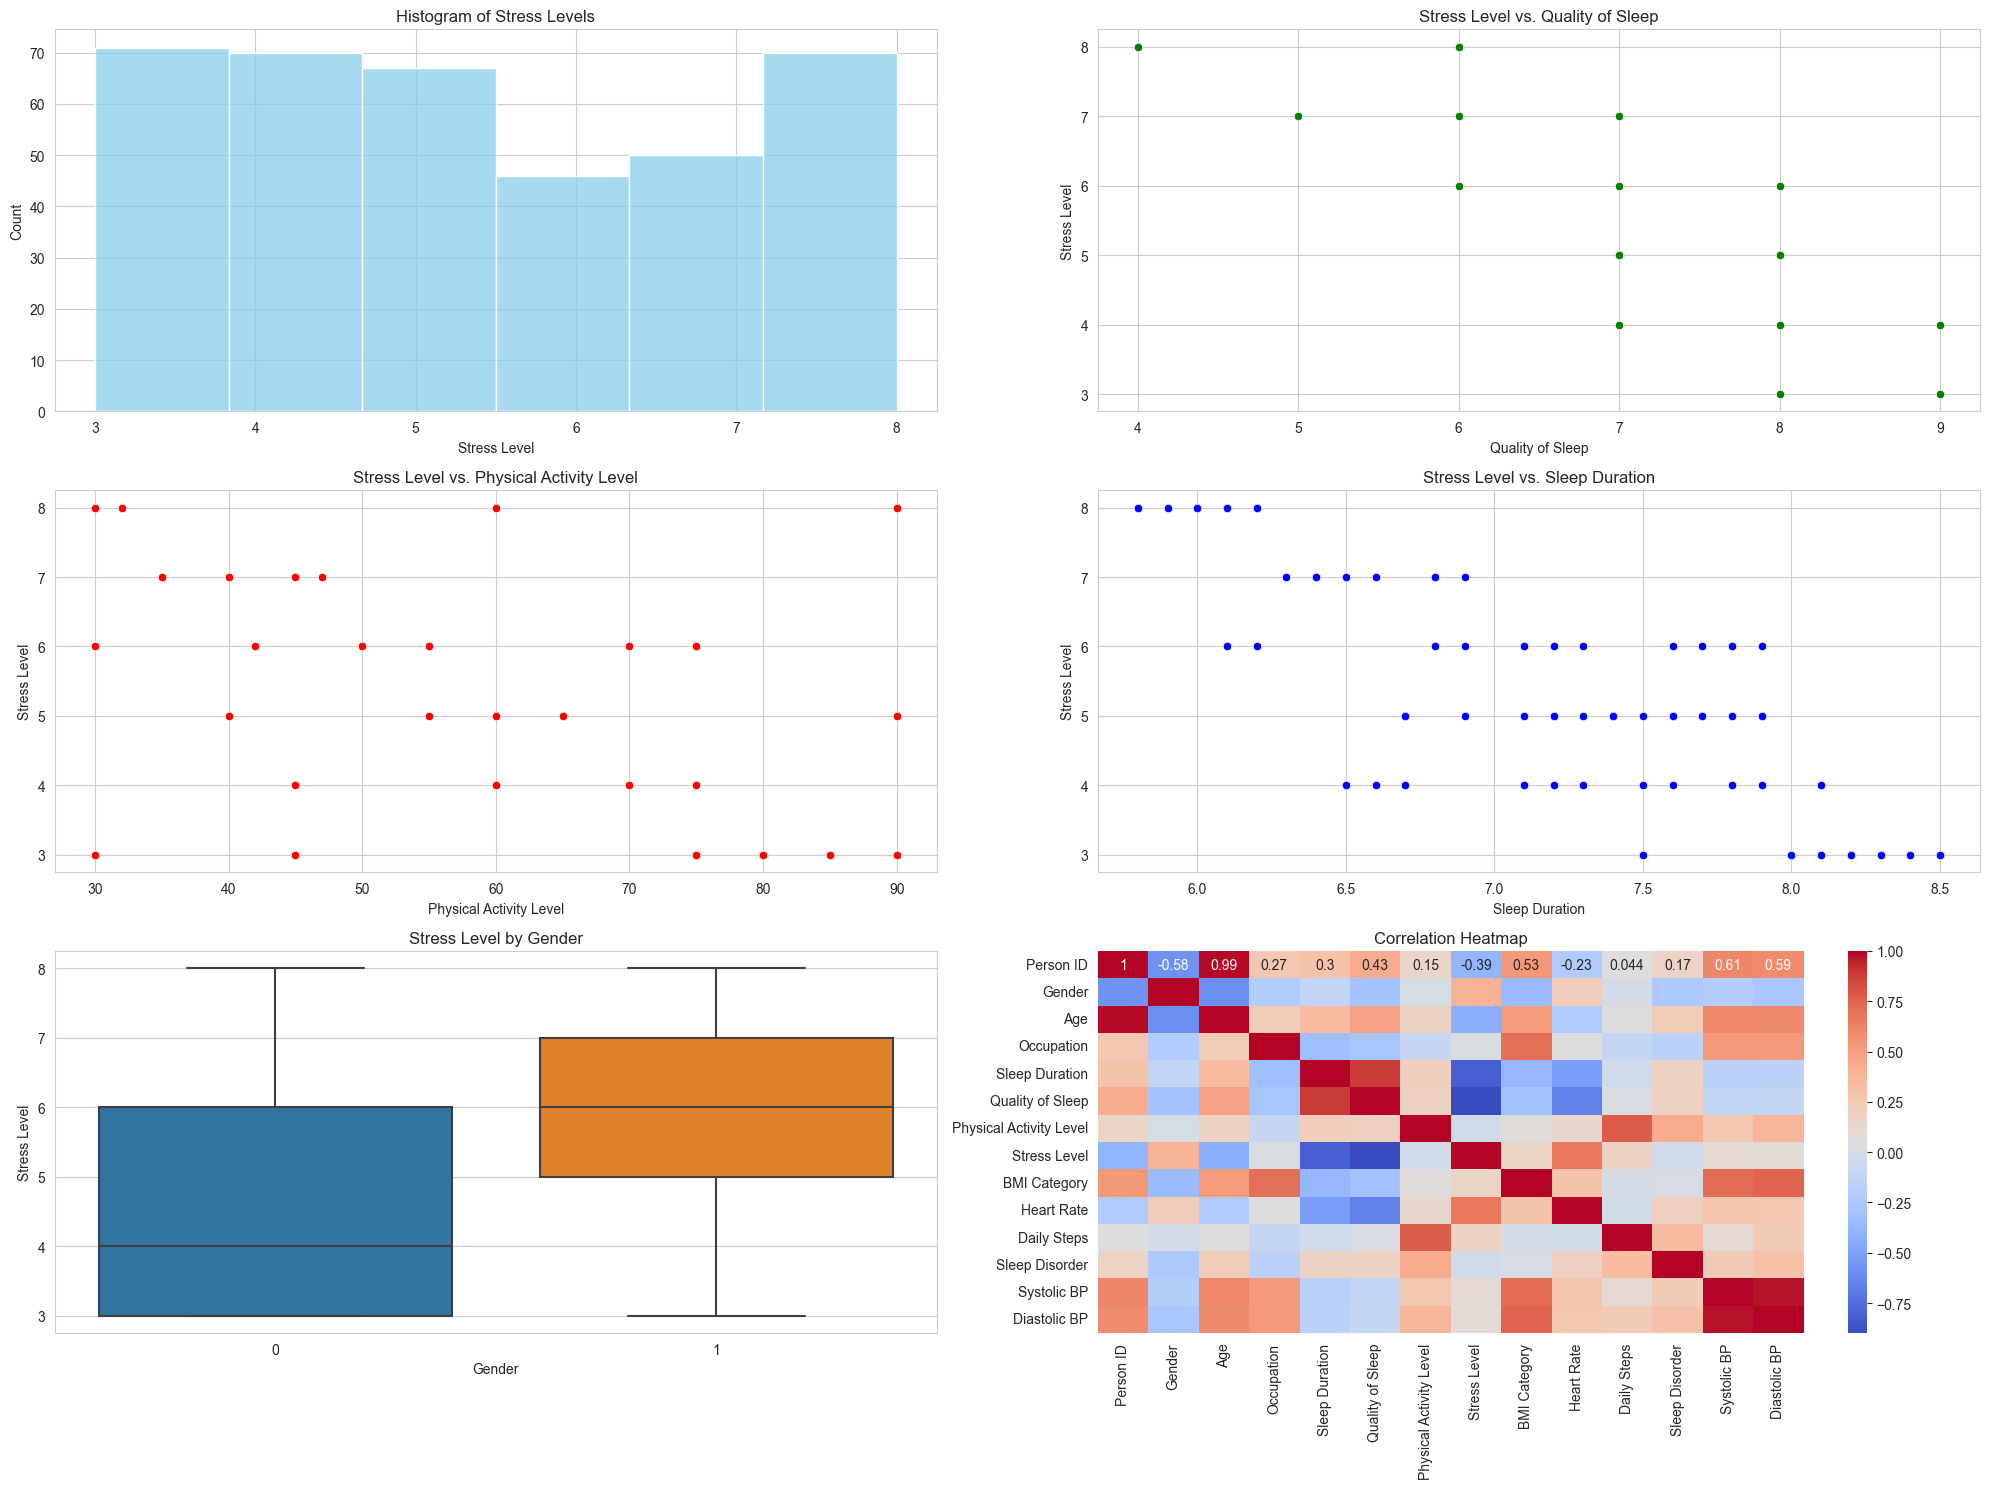

In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the figure
plt.figure(figsize=(20, 15))

# Histogram of Stress Levels
plt.subplot(3, 2, 1)
sns.histplot(df['Stress Level'], kde=False, bins=6, color='skyblue')
plt.title('Histogram of Stress Levels')

# Scatter plot of Stress Level vs. Quality of Sleep
plt.subplot(3, 2, 2)
sns.scatterplot(x='Quality of Sleep', y='Stress Level', data=df, color='green')
plt.title('Stress Level vs. Quality of Sleep')

# Scatter plot of Stress Level vs. Physical Activity Level
plt.subplot(3, 2, 3)
sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=df, color='red')
plt.title('Stress Level vs. Physical Activity Level')

# Scatter plot of Stress Level vs. Sleep Duration
plt.subplot(3, 2, 4)
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=df, color='blue')
plt.title('Stress Level vs. Sleep Duration')

# Boxplot of Stress Level by Gender
plt.subplot(3, 2, 5)
sns.boxplot(x='Gender', y='Stress Level', data=df)
plt.title('Stress Level by Gender')

# Correlation Heatmap
plt.subplot(3, 2, 6)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Show the plots
plt.tight_layout()
plt.show()

Histogram of Stress Levels shows that the majority of the records have stress levels around 5-6 on the scale of 1 to 10.
Also, there seems to be a not very strong relationship between better sleep quality and slightly lower stress levels.

# Model

## Selection

For predicting the stress level, we are going to use Random Forest, for its robustness to outliers and generally provides good results without heavy tuning.
Let's train a Random Fores  Regressor model to predict the stress level and evaluate which features are the most informative. We will also configure it to classify results into three categories as specified.

In [22]:
# Define features and labels
X = df.drop(['Person ID', 'Stress Level', 'Occupation'], axis=1)
y = pd.cut(df['Stress Level'], bins=[0, 3, 6, 8], include_lowest=True, labels=['0-3', '3-6', '6-8'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=12)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.9911504424778761
              precision    recall  f1-score   support

         0-3       1.00      1.00      1.00        23
         3-6       1.00      0.98      0.99        49
         6-8       0.98      1.00      0.99        41

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



## More important vartiables

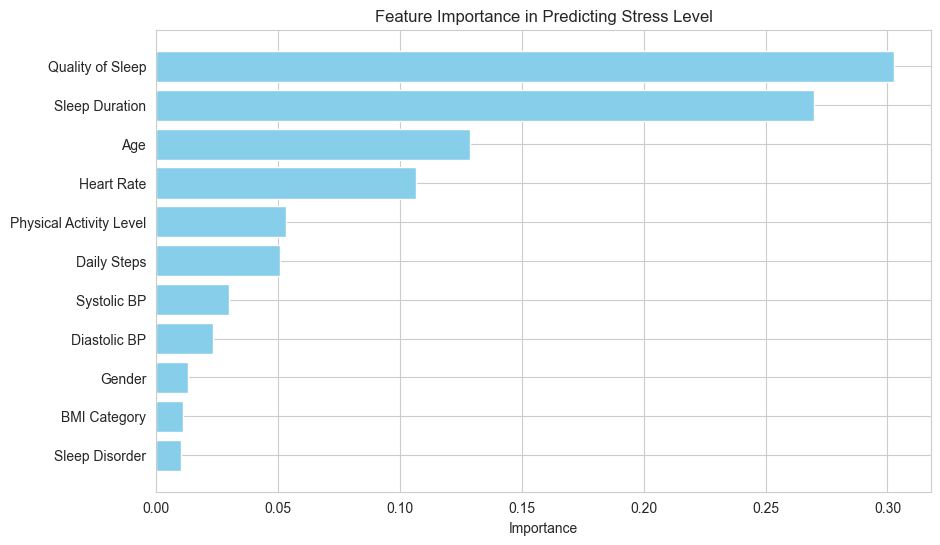

,Features,Importance
3,Quality of Sleep,0.302703
2,Sleep Duration,0.269712
1,Age,0.128975
6,Heart Rate,0.106797
4,Physical Activity Level,0.053504
7,Daily Steps,0.050689
9,Systolic BP,0.029781
10,Diastolic BP,0.023592
0,Gender,0.013248
5,BMI Category,0.010915


In [23]:
# Obtain feature importance.
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame to visualize the feature importances.
importances_df = pd.DataFrame({
    'Features': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Bar chart for feature importance.
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Features'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Stress Level')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important at the top.
plt.show()

importances_df

We can see that the more importatn Features are "Sleep Duration" and "Quality of Sleep".

## Stress-Associated Factors Groups

- **Sleep:** This group may include individuals whose stress levels are primarily influenced by the duration and quality of sleep.

- **Exercise:** This group may include individuals whose stress levels are more related to their level of physical activity.

- **Physical Conditions:** This group may encompass individuals whose stress is primarily associated with physical conditions such as heart rate, blood pressure, and the presence of sleep disorders.


# Conclusion
With the algorithm we have developed, we are demonstrating very high accuracy (> 90%). However, I believe that other individual factors need to be taken into account to determine it accurately. This machine learning model has been trained with data from "Google," according to the source.

# #2 Part

1. Seleccionar un algoritmo de los datos estudiados de aprendizaje no supervisado que pueda indicar qué factor es más importante para determinar ese estrés.
2. Responde y argumenta: ¿es este componente el mismo que determinaste al usar el modelo de regresión?
3. Determina qué factores distinguen más los datos entre
los niveles que se te solicitó en el ejercicio de regresión:
no estresado (0-3), estresado (3-6), extremadamente
estresado (7-8).

# LDA
We are going to use LDA (Linear Discriminant Analysis) for determination of main facts about stress. This method try to explain the differences between predefined classes.

First we are going to assign labels to the data according to stress levels.
Then normalize data. And finally, apply LDA to reduce dimensionality considering the labels.

In [24]:
# Creating a new column for stress
def stress_level(score):
    if score <= 3:
        return 0
    elif score <= 6:
        return 1
    else:
        return 2

df['stress_category'] = df['Stress Level'].apply(stress_level)

# Separation of features and labels.
X = df.drop(['Stress Level', 'stress_category', 'Occupation', 'Person ID'], axis=1).copy()
y = df['stress_category']
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,stress_category
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83,1
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,2
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,2
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2


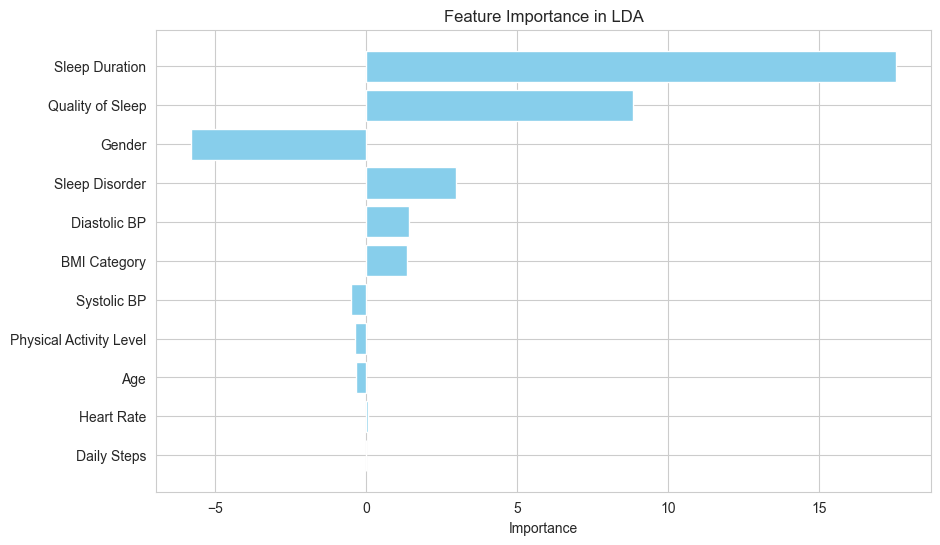

In [25]:
# Creation and fitting of the LDA model.
lda = LDA(n_components=2)  # n_components depends on the number of classes - 1.
X_lda = lda.fit_transform(X, y)

# Create a DataFrame to visualize the importances.
importances_df_unsuper = pd.DataFrame({
    'Features': X.columns,
    'Importance': lda.coef_[0]
})

# Calculate the absolute value of the importances.
importances_df_unsuper['Absolute Importance'] = abs(importances_df_unsuper['Importance'])

# Sort the DataFrame by the absolute value of importance in descending order.
importances_df_unsuper = importances_df_unsuper.sort_values(by='Absolute Importance', ascending=False)

# Bar chart for the feature importance.
plt.figure(figsize=(10, 6))
plt.barh(importances_df_unsuper['Features'], importances_df_unsuper['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in LDA')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el más importante en la parte superior
plt.show()

## Comparing results

In [26]:
# Display the importance of each feature.
importance = pd.DataFrame({'Feature': X.columns, 'Importance': lda.coef_[0]})
importance['Absolute Importance'] = abs(importance['Importance'])  # Calcula el valor absoluto
importance = importance.sort_values(by='Absolute Importance', ascending=False)
print(importance)

# Comparing with the the regresion model
importances_df

                    Feature  Importance  Absolute Importance
2            Sleep Duration   17.546136            17.546136
3          Quality of Sleep    8.860076             8.860076
0                    Gender   -5.786168             5.786168
8            Sleep Disorder    2.970363             2.970363
10             Diastolic BP    1.426048             1.426048
5              BMI Category    1.357972             1.357972
9               Systolic BP   -0.497314             0.497314
4   Physical Activity Level   -0.350842             0.350842
1                       Age   -0.319021             0.319021
6                Heart Rate    0.055236             0.055236
7               Daily Steps    0.000381             0.000381


,Features,Importance
3,Quality of Sleep,0.302703
2,Sleep Duration,0.269712
1,Age,0.128975
6,Heart Rate,0.106797
4,Physical Activity Level,0.053504
7,Daily Steps,0.050689
9,Systolic BP,0.029781
10,Diastolic BP,0.023592
0,Gender,0.013248
5,BMI Category,0.010915


**Principal matches**: Both models identify "Sleep Duration" and "Quality of Sleep" as the two most important factors, although in reverse order. Similarly, they suggest that both models agree that these two variables are crucial in predicting and differentiating stress levels.

**Discrepancies**: Some variables such as "Gender" and "Sleep Disorder" have significant importance in LDA but not in the regression model, which could indicate that these factors are more relevant.

# Conclusion

The LDA and regression models are quite aligned in identifying sleep duration and quality as crucial factors for stress, reaffirming the importance of focusing on improving these areas for HR interventions.

The identification of other factors such as gender and sleep disorder only in LDA but not as much in the regression model indicates that these factors may be more useful for specific categorizations rather than for general influences on a continuous stress metric.